Importing required libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pyodbc

In [4]:
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=MSI\DWCOURSEWORK;'        
)


Importing Data from sql database

In [5]:
# Batting Attributes

In [6]:
No_Innings_Batsman='''
SELECT Striker_Id, COUNT(DISTINCT Match_Id) AS Number_Of_Matches
FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY Striker_Id;'''

In [7]:
Batting_Avg='''SELECT Striker_Id,
       SUM(Batsman_Scored) AS TotalRuns,
       SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END) AS Times_Dismissed,
       SUM(Batsman_Scored) / NULLIF(SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END), 0) AS Batting_Average
FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY Striker_Id
ORDER BY Striker_Id DESC;'''

In [8]:
Batting_Strike_Rate='''SELECT Striker_Id,
       SUM(Batsman_Scored) AS TotalRuns,
       COUNT(*) AS TotalBallsFaced,
       CAST(SUM(Batsman_Scored) * 100.0 / NULLIF(COUNT(*), 0) AS INT) AS StrikeRate
FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY Striker_Id
ORDER BY Striker_Id DESC;'''

In [9]:
CFO='''SELECT
    Subquery.Striker_Id,
    SUM(Subquery.TotalRuns) AS TotalRuns,
    COUNT(CASE WHEN Subquery.TotalRuns >= 100 THEN 1 END) AS Centuries,
    COUNT(CASE WHEN Subquery.TotalRuns >= 50 AND Subquery.TotalRuns < 100 THEN 1 END) AS Fifties,
    COUNT(CASE WHEN Subquery.TotalRuns = 0 THEN 1 END) AS Zeroes
FROM (
    SELECT
        Match_Id,
        Striker_Id,
        SUM(Batsman_Scored) AS TotalRuns
    FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
    GROUP BY Match_Id, Striker_Id
) AS Subquery
GROUP BY Subquery.Striker_Id
ORDER BY TotalRuns DESC;
'''

In [10]:
df_No_Innings_Batsman = pd.read_sql_query(No_Innings_Batsman, conn)
df_Batting_Avg = pd.read_sql_query(Batting_Avg, conn)
df_Batting_Strike_Rate = pd.read_sql_query(Batting_Strike_Rate, conn)
df_CFO = pd.read_sql_query(CFO, conn)

C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\669658277.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_No_Innings_Batsman = pd.read_sql_query(No_Innings_Batsman, conn)
C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\669658277.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Batting_Avg = pd.read_sql_query(Batting_Avg, conn)
C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\669658277.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Batting_Strike_Rate = pd.read_sql_query(Batting_Strike_Rate, conn)
C

In [11]:
# Bowling Attributes 

In [12]:
No_Innings_Bowler='''SELECT Bowler_Id,COUNT(DISTINCT Match_Id) AS Number_Of_Matches
FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY Bowler_Id
'''

In [13]:
No_overs='''SELECT 
    Bowler_Id,
    COUNT(DISTINCT CONCAT(Match_Id, '-', Over_Id)) AS TotalOversBowled
FROM 
    [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY
    Bowler_Id;'''


In [14]:
Bowling_Avg='''SELECT Bowler_Id,
       SUM(Batsman_Scored) AS TotalRuns,
       SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END) AS Wickets_taken,
       SUM(Batsman_Scored) / NULLIF(SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END), 0) AS Bowling_Average
FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY Bowler_Id
ORDER BY Bowler_Id DESC;
'''

In [15]:
Bowling_Strike_Rate='''SELECT 
    Bowler_Id,
    COUNT(*) AS TotalBallsBowled,
    SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END) AS TotalWicketsTaken,
    COUNT(*) / NULLIF(SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END), 0) AS BowlingStrikeRate
FROM 
    [IPL_Staging_area].[dbo].[Ball_By_Ball]
GROUP BY
    Bowler_Id
ORDER BY
    Bowler_Id DESC;
'''

In [16]:
FWH='''SELECT
    Bowler_Id,
    COUNT(*) AS FourWicketHauls
FROM
    (SELECT
        Match_Id,
        Bowler_Id,
        SUM(CASE WHEN Dissimal_Type IS NOT NULL THEN 1 ELSE 0 END) AS Wickets_Taken
    FROM [IPL_Staging_area].[dbo].[Ball_By_Ball]
    GROUP BY Match_Id, Bowler_Id) AS WicketsPerInnings
WHERE Wickets_Taken >= 4
GROUP BY Bowler_Id
ORDER BY FourWicketHauls DESC;


'''

In [17]:
df_No_Innings_Bowler = pd.read_sql_query(No_Innings_Bowler, conn)
df_No_overs = pd.read_sql_query(No_overs, conn)
df_Bowling_Avg = pd.read_sql_query(Bowling_Avg, conn)
df_Bowling_Strike_Rate = pd.read_sql_query(Bowling_Strike_Rate, conn)
df_FWH= pd.read_sql_query(FWH, conn)

C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\2932576149.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_No_Innings_Bowler = pd.read_sql_query(No_Innings_Bowler, conn)
C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\2932576149.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_No_overs = pd.read_sql_query(No_overs, conn)
C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\2932576149.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Bowling_Avg = pd.read_sql_query(Bowling_Avg, conn)
C:\Users\tonny\AppData

In [18]:
df_No_Innings_Batsman

,Striker_Id,Number_Of_Matches
0,221,96
1,154,73
2,187,100
3,340,21
4,255,49
...,...,...
429,431,3
430,193,1
431,223,2
432,416,3


In [19]:
df_Batting_Avg

,Striker_Id,TotalRuns,Times_Dismissed,Batting_Average
0,434,3,0,NaN
1,433,24,2,12.0
2,432,0,1,0.0
3,431,104,3,34.0
4,430,0,1,0.0
...,...,...,...,...
429,5,64,8,8.0
430,4,1322,31,42.0
431,3,91,3,30.0
432,2,2435,77,31.0


In [20]:
df_Batting_Strike_Rate

,Striker_Id,TotalRuns,TotalBallsFaced,StrikeRate
0,434,3,4,75
1,433,24,15,160
2,432,0,1,0
3,431,104,78,133
4,430,0,1,0
...,...,...,...,...
429,5,64,84,76
430,4,1322,1101,120
431,3,91,129,70
432,2,2435,1954,124


In [21]:
df_CFO

,Striker_Id,TotalRuns,Centuries,Fifties,Zeroes
0,21,4106,1,28,7
1,8,4105,4,27,5
2,57,3874,1,29,7
3,40,3634,0,31,11
4,162,3447,5,21,4
...,...,...,...,...,...
429,317,0,0,0,1
430,222,0,0,0,2
431,405,0,0,0,1
432,337,0,0,0,1


In [22]:
df_FWH

,Bowler_Id,FourWicketHauls
0,194,7
1,310,4
2,124,4
3,315,4
4,136,4
...,...,...
82,83,1
83,80,1
84,49,1
85,44,1


In [23]:
Striker1=pd.merge(df_No_Innings_Batsman,df_Batting_Avg, on='Striker_Id',how='outer')


In [24]:
Striker2=pd.merge(df_Batting_Strike_Rate,df_CFO,on='Striker_Id',how='outer')

In [25]:
Striker=pd.merge(Striker1,Striker2,on='Striker_Id',how='outer')

In [26]:
Striker

,Striker_Id,Number_Of_Matches,TotalRuns,Times_Dismissed,Batting_Average,TotalRuns_x,TotalBallsFaced,StrikeRate,TotalRuns_y,Centuries,Fifties,Zeroes
0,221,96,1959,60,32.0,1959,1380,141,1959,0,9,3
1,154,73,1993,45,44.0,1993,1634,121,1993,0,14,1
2,187,100,3373,77,43.0,3373,2440,138,3373,2,32,7
3,340,21,280,12,23.0,280,323,86,280,0,0,0
4,255,49,688,23,29.0,688,542,126,688,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
429,431,3,104,3,34.0,104,78,133,104,0,1,0
430,193,1,0,1,0.0,0,1,0,0,0,0,1
431,223,2,4,1,4.0,4,13,30,4,0,0,0
432,416,3,13,1,13.0,13,8,162,13,0,0,1


In [27]:
df_No_Innings_Bowler 

,Bowler_Id,Number_Of_Matches
0,154,47
1,186,55
2,136,112
3,391,11
4,374,45
...,...,...
326,342,7
327,411,2
328,193,3
329,443,1


In [28]:

df_No_overs 

,Bowler_Id,TotalOversBowled
0,136,403
1,315,264
2,409,23
3,153,71
4,221,200
...,...,...
326,396,1
327,465,5
328,411,2
329,431,1


In [29]:
df_Bowling_Avg

,Bowler_Id,TotalRuns,Wickets_taken,Bowling_Average
0,465,38,0,NaN
1,464,53,3,17.0
2,463,147,3,49.0
3,462,94,7,13.0
4,461,38,1,38.0
...,...,...,...,...
326,9,2222,50,44.0
327,8,354,5,70.0
328,5,61,2,30.0
329,4,467,7,66.0


In [30]:

df_Bowling_Strike_Rate 

,Bowler_Id,TotalBallsBowled,TotalWicketsTaken,BowlingStrikeRate
0,465,33,0,NaN
1,464,43,3,14.0
2,463,96,3,32.0
3,462,74,7,10.0
4,461,25,1,25.0
...,...,...,...,...
326,9,1799,50,35.0
327,8,264,5,52.0
328,5,63,2,31.0
329,4,323,7,46.0


In [31]:
Bowler1=pd.merge(df_No_Innings_Bowler,df_No_overs,on='Bowler_Id',how='outer'  )
Bowler2=pd.merge(df_Bowling_Avg,df_Bowling_Strike_Rate,on='Bowler_Id',how='outer' )

In [32]:
Bowler=pd.merge(Bowler1,Bowler2,on='Bowler_Id',how='outer')

In [33]:
Bowler

,Bowler_Id,Number_Of_Matches,TotalOversBowled,TotalRuns,Wickets_taken,Bowling_Average,TotalBallsBowled,TotalWicketsTaken,BowlingStrikeRate
0,154,47,112,766,22,34.0,683,22,31.0
1,186,55,177,1376,40,34.0,1069,40,26.0
2,136,112,403,2846,107,26.0,2466,107,23.0
3,391,11,36,294,8,36.0,228,8,28.0
4,374,45,161,1157,46,25.0,986,46,21.0
...,...,...,...,...,...,...,...,...,...
326,342,7,20,198,3,66.0,130,3,43.0
327,411,2,2,15,0,NaN,12,0,NaN
328,193,3,8,55,2,27.0,50,2,25.0
329,443,1,1,13,0,NaN,6,0,NaN


In [34]:
Striker

,Striker_Id,Number_Of_Matches,TotalRuns,Times_Dismissed,Batting_Average,TotalRuns_x,TotalBallsFaced,StrikeRate,TotalRuns_y,Centuries,Fifties,Zeroes
0,221,96,1959,60,32.0,1959,1380,141,1959,0,9,3
1,154,73,1993,45,44.0,1993,1634,121,1993,0,14,1
2,187,100,3373,77,43.0,3373,2440,138,3373,2,32,7
3,340,21,280,12,23.0,280,323,86,280,0,0,0
4,255,49,688,23,29.0,688,542,126,688,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
429,431,3,104,3,34.0,104,78,133,104,0,1,0
430,193,1,0,1,0.0,0,1,0,0,0,0,1
431,223,2,4,1,4.0,4,13,30,4,0,0,0
432,416,3,13,1,13.0,13,8,162,13,0,0,1


In [35]:
Bowler.rename(columns={'Bowler_Id': 'Player_Id','Number_Of_Matches':'No_Matches_Bowled','BowlingStrikeRate':'Bowling_Strike_Rate','TotalOversBowled':'Total_Overs_Bowled'}, inplace=True)
Striker.rename(columns={'Striker_Id': 'Player_Id', 'Number_Of_Matches':'No_of_Batted_Matches','StrikeRate':'Batting_Strike_Rate'}, inplace=True)

In [36]:
Player=pd.merge(Striker,Bowler,on='Player_Id',how='outer')

C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\1806493935.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotalRuns_x'} in the result is deprecated and will raise a MergeError in a future version.
  Player=pd.merge(Striker,Bowler,on='Player_Id',how='outer')


In [37]:
Player

,Player_Id,No_of_Batted_Matches,TotalRuns_x,Times_Dismissed,Batting_Average,TotalRuns_x,TotalBallsFaced,Batting_Strike_Rate,TotalRuns_y,Centuries,Fifties,Zeroes,No_Matches_Bowled,Total_Overs_Bowled,TotalRuns_y,Wickets_taken,Bowling_Average,TotalBallsBowled,TotalWicketsTaken,Bowling_Strike_Rate
0,221,96.0,1959.0,60.0,32.0,1959.0,1380.0,141.0,1959.0,0.0,9.0,3.0,80.0,200.0,1659.0,46.0,36.0,1264.0,46.0,27.0
1,154,73.0,1993.0,45.0,44.0,1993.0,1634.0,121.0,1993.0,0.0,14.0,1.0,47.0,112.0,766.0,22.0,34.0,683.0,22.0,31.0
2,187,100.0,3373.0,77.0,43.0,3373.0,2440.0,138.0,3373.0,2.0,32.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,340,21.0,280.0,12.0,23.0,280.0,323.0,86.0,280.0,0.0,0.0,0.0,5.0,6.0,37.0,0.0,NaN,37.0,0.0,NaN
4,255,49.0,688.0,23.0,29.0,688.0,542.0,126.0,688.0,0.0,0.0,5.0,53.0,84.0,618.0,17.0,36.0,517.0,17.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,25.0,188.0,6.0,31.0,162.0,6.0,27.0
461,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,87.0,3.0,29.0,51.0,3.0,17.0
462,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,38.0,0.0,NaN,33.0,0.0,NaN
463,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,86.0,2.0,43.0,49.0,2.0,24.0


In [38]:
Player.columns

Index(['Player_Id', 'No_of_Batted_Matches', 'TotalRuns_x', 'Times_Dismissed',
       'Batting_Average', 'TotalRuns_x', 'TotalBallsFaced',
       'Batting_Strike_Rate', 'TotalRuns_y', 'Centuries', 'Fifties', 'Zeroes',
       'No_Matches_Bowled', 'Total_Overs_Bowled', 'TotalRuns_y',
       'Wickets_taken', 'Bowling_Average', 'TotalBallsBowled',
       'TotalWicketsTaken', 'Bowling_Strike_Rate'],
      dtype='object')

In [39]:
Player=Player[['Player_Id','Batting_Average', 'No_of_Batted_Matches', 
        'Batting_Strike_Rate','Centuries', 'Fifties', 'Zeroes',
       'Total_Overs_Bowled','No_Matches_Bowled', 'Bowling_Strike_Rate','Bowling_Average']]

In [40]:
df_FWH.rename(columns={'Bowler_Id': 'Player_Id','FourWicketHauls':'Four_Wicket_Hauls'}, inplace=True)


In [41]:
Player=pd.merge(Player,df_FWH,on='Player_Id',how='outer')

In [42]:
Player

,Player_Id,Batting_Average,No_of_Batted_Matches,Batting_Strike_Rate,Centuries,Fifties,Zeroes,Total_Overs_Bowled,No_Matches_Bowled,Bowling_Strike_Rate,Bowling_Average,Four_Wicket_Hauls
0,221,32.0,96.0,141.0,0.0,9.0,3.0,200.0,80.0,27.0,36.0,1.0
1,154,44.0,73.0,121.0,0.0,14.0,1.0,112.0,47.0,31.0,34.0,1.0
2,187,43.0,100.0,138.0,2.0,32.0,7.0,NaN,NaN,NaN,NaN,NaN
3,340,23.0,21.0,86.0,0.0,0.0,0.0,6.0,5.0,NaN,NaN,NaN
4,255,29.0,49.0,126.0,0.0,0.0,5.0,84.0,53.0,30.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
460,446,NaN,NaN,NaN,NaN,NaN,NaN,25.0,8.0,27.0,31.0,1.0
461,456,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,17.0,29.0,NaN
462,465,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN
463,436,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,24.0,43.0,NaN


In [43]:
Player.to_csv(r'C:\Users\tonny\Desktop\Output.csv', index=False)


In [44]:
Player.columns

Index(['Player_Id', 'Batting_Average', 'No_of_Batted_Matches',
       'Batting_Strike_Rate', 'Centuries', 'Fifties', 'Zeroes',
       'Total_Overs_Bowled', 'No_Matches_Bowled', 'Bowling_Strike_Rate',
       'Bowling_Average', 'Four_Wicket_Hauls'],
      dtype='object')

In [45]:
Player

,Player_Id,Batting_Average,No_of_Batted_Matches,Batting_Strike_Rate,Centuries,Fifties,Zeroes,Total_Overs_Bowled,No_Matches_Bowled,Bowling_Strike_Rate,Bowling_Average,Four_Wicket_Hauls
0,221,32.0,96.0,141.0,0.0,9.0,3.0,200.0,80.0,27.0,36.0,1.0
1,154,44.0,73.0,121.0,0.0,14.0,1.0,112.0,47.0,31.0,34.0,1.0
2,187,43.0,100.0,138.0,2.0,32.0,7.0,NaN,NaN,NaN,NaN,NaN
3,340,23.0,21.0,86.0,0.0,0.0,0.0,6.0,5.0,NaN,NaN,NaN
4,255,29.0,49.0,126.0,0.0,0.0,5.0,84.0,53.0,30.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
460,446,NaN,NaN,NaN,NaN,NaN,NaN,25.0,8.0,27.0,31.0,1.0
461,456,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,17.0,29.0,NaN
462,465,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN
463,436,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,24.0,43.0,NaN


In [46]:
Player.fillna(0, inplace=True)

In [47]:
Player.columns

Index(['Player_Id', 'Batting_Average', 'No_of_Batted_Matches',
       'Batting_Strike_Rate', 'Centuries', 'Fifties', 'Zeroes',
       'Total_Overs_Bowled', 'No_Matches_Bowled', 'Bowling_Strike_Rate',
       'Bowling_Average', 'Four_Wicket_Hauls'],
      dtype='object')

In [48]:
Player['Batting_Consistency'] = (
    0.4262 * Player['Batting_Average']
    + 0.2566 * Player['No_of_Batted_Matches']
    + 0.1510 * Player['Batting_Strike_Rate']
    + 0.0787 * Player['Centuries']
    + 0.0556 * Player['Fifties']
    - 0.0328 * Player['Zeroes']
)

Player['Bowling_Consistency'] = (
    0.4174 * Player['Total_Overs_Bowled']
    + 0.2634 * Player['No_Matches_Bowled']
    + 0.1602 * Player['Bowling_Strike_Rate']
    + 0.0975 * Player['Bowling_Average']
    + 0.0615 * Player['Four_Wicket_Hauls']
)

In [49]:
Player

,Player_Id,Batting_Average,No_of_Batted_Matches,Batting_Strike_Rate,Centuries,Fifties,Zeroes,Total_Overs_Bowled,No_Matches_Bowled,Bowling_Strike_Rate,Bowling_Average,Four_Wicket_Hauls,Batting_Consistency,Bowling_Consistency
0,221,32.0,96.0,141.0,0.0,9.0,3.0,200.0,80.0,27.0,36.0,1.0,59.9650,112.4489
1,154,44.0,73.0,121.0,0.0,14.0,1.0,112.0,47.0,31.0,34.0,1.0,56.5012,67.4713
2,187,43.0,100.0,138.0,2.0,32.0,7.0,0.0,0.0,0.0,0.0,0.0,66.5316,0.0000
3,340,23.0,21.0,86.0,0.0,0.0,0.0,6.0,5.0,0.0,0.0,0.0,28.1772,3.8214
4,255,29.0,49.0,126.0,0.0,0.0,5.0,84.0,53.0,30.0,36.0,0.0,43.7952,57.3378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,446,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,27.0,31.0,1.0,0.0000,19.9516
461,456,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,17.0,29.0,0.0,0.0000,9.4169
462,465,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0000,2.6138
463,436,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,24.0,43.0,0.0,0.0000,11.9033


In [50]:
filtered_Player = Player[(Player['No_of_Batted_Matches'] > 15) | (Player['No_Matches_Bowled'] > 15)]

In [51]:
Player_Details='''SELECT [Player_Id]
      ,[Player_Name]
      ,[DOB]
  FROM [IPL].[dbo].[Player]
'''

In [52]:
df_Player_Details = pd.read_sql_query(Player_Details, conn)


C:\Users\tonny\AppData\Local\Temp\ipykernel_20332\2127819719.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Player_Details = pd.read_sql_query(Player_Details, conn)


In [53]:
df_Player_Details

,Player_Id,Player_Name,DOB
0,1,SC Ganguly,1972-07-08
1,2,BB McCullum,1981-09-27
2,3,RT Ponting,1974-12-19
3,4,DJ Hussey,1977-07-15
4,5,Mohammad Hafeez,1980-10-17
...,...,...,...
518,519,Subroto Das,None
519,520,K Srinivasan,None
520,521,VK Sharma,None
521,523,AV Wankhade,1992-03-14


In [54]:
Player_Performance=filtered_Player[['Player_Id','Batting_Consistency','Bowling_Consistency']]

In [55]:
Player_Performance

,Player_Id,Batting_Consistency,Bowling_Consistency
0,221,59.9650,112.4489
1,154,56.5012,67.4713
2,187,66.5316,0.0000
3,340,28.1772,3.8214
4,255,43.7952,57.3378
...,...,...,...
419,161,34.3168,22.9073
420,386,14.7658,39.9565
431,223,6.7480,58.5457
447,460,0.0000,34.7671


In [56]:
Player_info=pd.merge(Player_Performance,df_Player_Details,on='Player_Id',how='outer')

In [57]:
Player_info

,Player_Id,Batting_Consistency,Bowling_Consistency,Player_Name,DOB
0,221,59.9650,112.4489,KA Pollard,1987-05-12
1,154,56.5012,67.4713,JP Duminy,1984-04-14
2,187,66.5316,0.0000,DA Warner,1986-10-27
3,340,28.1772,3.8214,GH Vihari,1993-10-13
4,255,43.7952,57.3378,STR Binny,1984-06-03
...,...,...,...,...,...
518,519,NaN,NaN,Subroto Das,None
519,520,NaN,NaN,K Srinivasan,None
520,521,NaN,NaN,VK Sharma,None
521,523,NaN,NaN,AV Wankhade,1992-03-14


In [58]:
Player_info.dropna()

,Player_Id,Batting_Consistency,Bowling_Consistency,Player_Name,DOB
0,221,59.9650,112.4489,KA Pollard,1987-05-12
1,154,56.5012,67.4713,JP Duminy,1984-04-14
2,187,66.5316,0.0000,DA Warner,1986-10-27
3,340,28.1772,3.8214,GH Vihari,1993-10-13
4,255,43.7952,57.3378,STR Binny,1984-06-03
...,...,...,...,...,...
199,161,34.3168,22.9073,RS Bopara,1985-05-04
200,386,14.7658,39.9565,Imran Tahir,1979-03-27
201,223,6.7480,58.5457,DP Nannes,1976-05-16
202,460,0.0000,34.7671,Mustafizur Rahman,1995-09-06


In [59]:
Player_info['DOB'] = pd.to_datetime(Player_info['DOB'])


In [60]:
reference_year = pd.Timestamp('2012-01-01')
Player_info['Age'] = (reference_year - Player_info['DOB']).astype('<m8[Y]')

Splitting Players into Batsman and Bowlers Based on Player Performance

In [61]:
Batsman_df = Player_info[Player_info['Batting_Consistency'] > Player_info['Bowling_Consistency']]
Bowler_df = Player_info[Player_info['Bowling_Consistency'] > Player_info['Batting_Consistency']]

In [62]:
Batsman_df

,Player_Id,Batting_Consistency,Bowling_Consistency,Player_Name,DOB,Age
2,187,66.5316,0.0000,DA Warner,1986-10-27,25.0
3,340,28.1772,3.8214,GH Vihari,1993-10-13,18.0
6,306,51.5121,0.6808,SPD Smith,1989-06-02,22.0
7,33,27.9906,0.0000,M Kaif,1980-12-01,31.0
8,204,60.3924,0.0000,OA Shah,1978-10-22,33.0
...,...,...,...,...,...,...
193,228,49.4618,33.3568,Bipul Sharma,1983-09-28,28.0
195,275,87.9062,26.1560,JEC Franklin,1980-11-07,31.0
196,393,32.7842,0.0000,SS Iyer,1994-12-06,17.0
197,329,33.8812,11.3248,Gurkeerat Singh,1990-06-29,21.0


In [63]:
Bowler_df

,Player_Id,Batting_Consistency,Bowling_Consistency,Player_Name,DOB,Age
0,221,59.9650,112.4489,KA Pollard,1987-05-12,24.0
1,154,56.5012,67.4713,JP Duminy,1984-04-14,27.0
4,255,43.7952,57.3378,STR Binny,1984-06-03,27.0
5,374,32.6816,84.9176,AR Patel,1994-01-20,17.0
9,153,27.3570,44.3471,RR Powar,1978-05-20,33.0
...,...,...,...,...,...,...
198,322,33.1000,48.9180,P Negi,1993-01-06,18.0
200,386,14.7658,39.9565,Imran Tahir,1979-03-27,32.0
201,223,6.7480,58.5457,DP Nannes,1976-05-16,35.0
202,460,0.0000,34.7671,Mustafizur Rahman,1995-09-06,16.0


In [64]:
import matplotlib.pyplot as plt


correlation_batsman = Batsman_df['Batting_Consistency'].corr(Batsman_df['Age'])

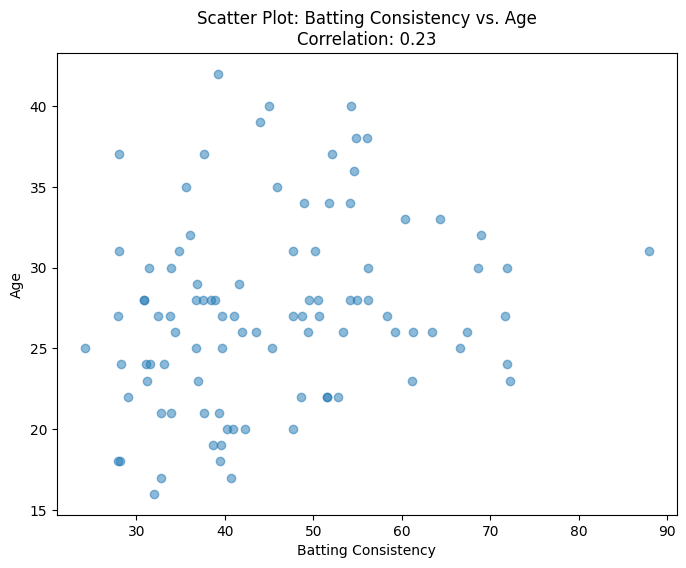

In [66]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Batsman_df['Batting_Consistency'], Batsman_df['Age'], alpha=0.5)
plt.xlabel('Batting Consistency')
plt.ylabel('Age')
plt.title(f"Scatter Plot: Batting Consistency vs. Age\nCorrelation: {correlation_batsman:.2f}")
# plt.grid(True)
plt.show()


In [67]:
correlation_bowler = Bowler_df['Batting_Consistency'].corr(Bowler_df['Age'])

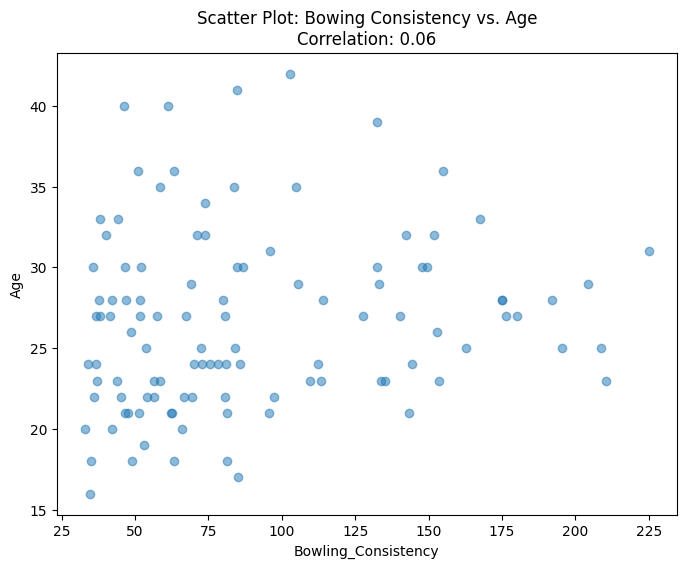

In [68]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Bowler_df['Bowling_Consistency'], Bowler_df['Age'], alpha=0.5)
plt.xlabel('Bowling_Consistency')
plt.ylabel('Age')
plt.title(f"Scatter Plot: Bowing Consistency vs. Age\nCorrelation: {correlation_bowler:.2f}")
# plt.grid(True)
plt.show()
